In [1]:
from fastai.vision.all import *
import albumentations as A
from natsort import natsorted
import os, sys, gc, cv2, yaml
from pathlib import Path
sys.path.append(os.path.abspath('..'))
from utils.preprocess_utils import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device: ', device)

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations


device:  cpu


#### 1. Set the path to folder containing Dataset (full PID Images + Yolo Annotations)

In [3]:
root_dir = Path('../data/sample_dataset/') # root directory
original_dir = 'original' # directory in root directory containing PID Images and CAware  YOLO annotations
dataset_dir = Path(f"{root_dir}/{original_dir}")

#### 2. Create Class Agnostic dataset from Original *class-aware* dataset

In [3]:
class_aware_to_class_agnostic(dataset_dir, folder_name = 'original_class_agnostic')

Copying 10 files to ..\data\sample_dataset\original_class_agnostic...
Successfully copied 10 files to ..\data\sample_dataset\original_class_agnostic
Converting annotations to class-agnostic format...
Class-agnostic conversion complete. Annotations saved to ..\data\sample_dataset\original_class_agnostic


#### 3. Create overlapping patches from full-sized PIDs

<img src="../media/overlapping_patches.png" alt="Overlapping_patches" style="width:1200px;"/>


In [4]:
make_patches_w_overlap(dataset_dir, overlap=0.10, sz=1024, 
                       class_aware_folder='patches_class_aware',
                       class_agn_folder='patches_class_agnostic',
                       n_random_patches=0 # number of random patches
                      ) 

Processed patches for image: 0.jpg
Processed patches for image: 1.jpg
Processed patches for image: 2.jpg
Processed patches for image: 3.jpg
Processed patches for image: 4.jpg
Processed patches for image: 5.jpg
Processed patches for image: 6.jpg
Processed patches for image: 7.jpg
Processed patches for image: 8.jpg
Processed patches for image: 9.jpg
********* All patches created successfully *************
Copying 148 files to ..\data\sample_dataset\patches_class_agnostic...
Successfully copied 148 files to ..\data\sample_dataset\patches_class_agnostic
Converting annotations to class-agnostic format...
Class-agnostic conversion complete. Annotations saved to ..\data\sample_dataset\patches_class_agnostic


#### 4. Visualize created patches and their annotations (as a check - Optional)

<Figure size 1500x500 with 0 Axes>

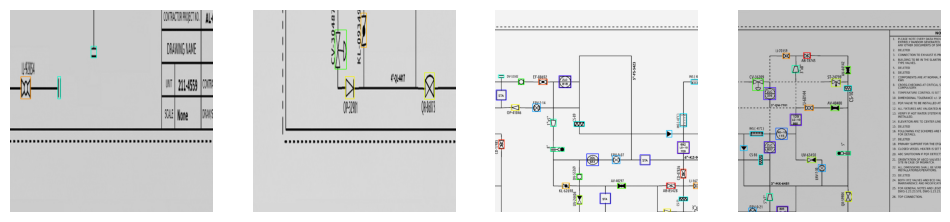

In [9]:
# Class-Aware crops
crops_dir = Path('../data/sample_dataset/patches_class_aware/')
plot_ims_labels_grid(crops_dir, n=4, num_classes=42)

<Figure size 1500x500 with 0 Axes>

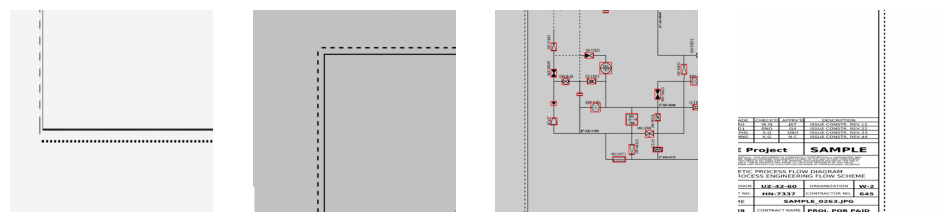

In [6]:
crops_dir = Path('../data/sample_dataset/patches_class_agnostic/')
plot_ims_labels_grid(crops_dir, n=4, num_classes=42)

<Figure size 3500x3500 with 0 Axes>

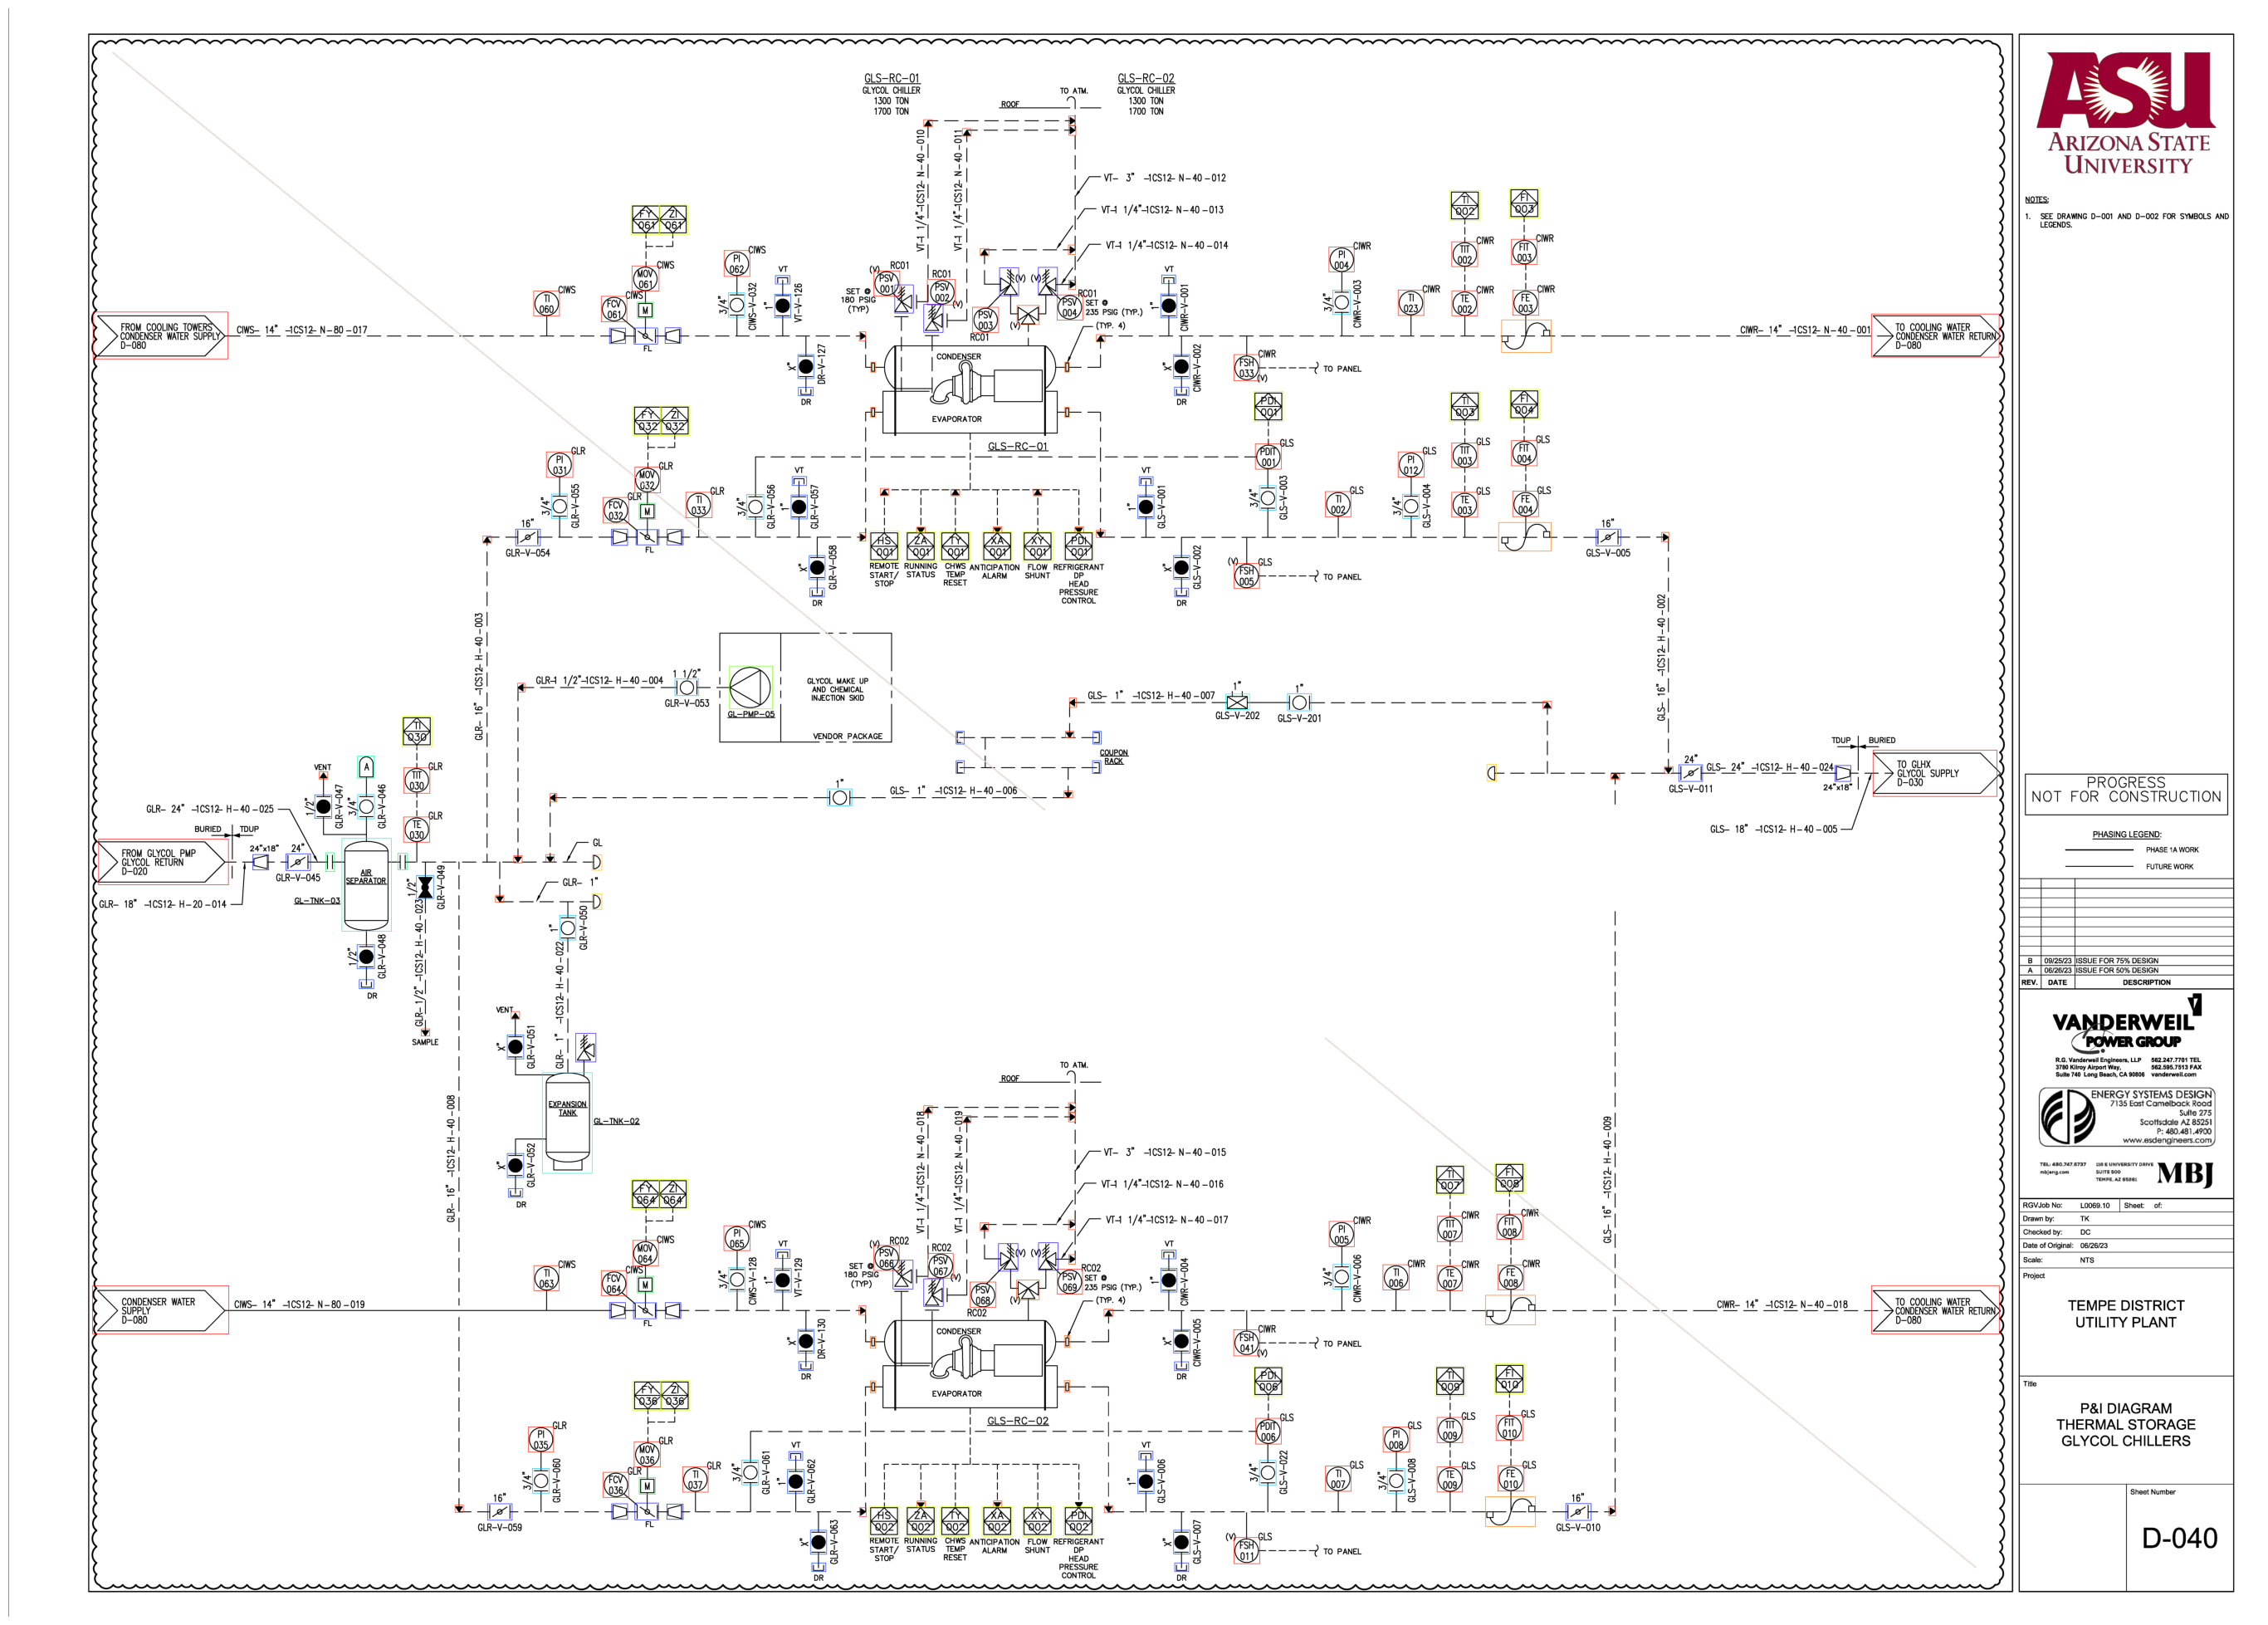

In [3]:
dataset_dir = '../media/lt/'
plot_ims_labels_grid(dataset_dir, n=1, num_classes=62, figsize=(35,35))